# Problem 1: Data with R

In [1]:
%load_ext rpy2.ipython

In [3]:
%%R

library(tidyverse)

In [5]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

In [6]:
%%R

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: Don't forget to make sure the labels are factors!
# hint hint: Read the errors carefully! 
# Read the documentation for parse_factor (readr) if confused!

NULL


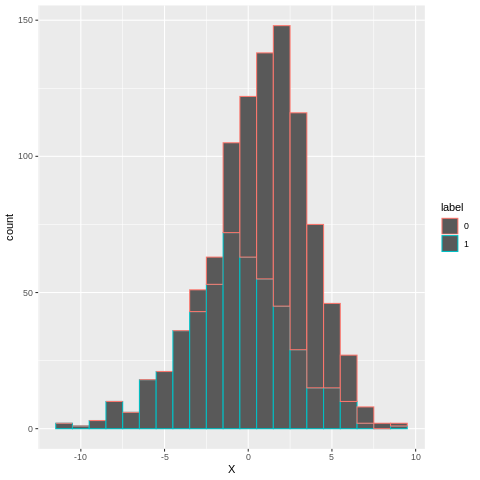

In [11]:
%%R

data_for_plot = dat %>%
                    mutate(label=as.character(label)) %>%
                    mutate(label=parse_factor(label, include_na = TRUE))

ggplot(data_for_plot, aes(X, color=label)) + geom_histogram(binwidth=1)

# Problem 2: Using Classes in Python

In this problem, you will use the classes in the following cell. **You do not need to modify the classes or touch the code in the following cell in any way!**

In [12]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [13]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [15]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)
import random

random.shuffle(dat)

In [16]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [17]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data

train_data = dat[:700]
test_data = dat[700:]
print(f'Train data size {len(train_data)}; test data size {len(test_data)}')

Train data size 700; test data size 300


In [18]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.

X_train = [i[0] for i in train_data]
y_train = [i[1] for i in train_data]

X_test = [i[0] for i in test_data]
y_test = [i[1] for i in test_data]

## Problem 2.3: Testing models!

In [19]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label

knn = KNearestNeighbors(K=5)
knn.fit(X_train, y_train)
knn_y_pred = [knn.predict(x) for x in X_test]

kfn = KFurthestNeighbors(K=5)
kfn.fit(X_train, y_train)
kfn_y_pred = [kfn.predict(x) for x in X_test]

In [20]:
# Compare the two classes of models!

from sklearn.metrics import f1_score
import numpy as np
                                     
print('For KNearestNeighbors f1 measure is equal to %1.2f,' %f1_score(y_test, knn_y_pred))
print('while for KFurthestNeighbors it is %1.2f' %f1_score(y_test, kfn_y_pred))

For KNearestNeighbors f1 measure is equal to 0.66,
while for KFurthestNeighbors it is 0.51


In [21]:
differences = []

for i in range(10):
    random.shuffle(dat)
    
    train_data = dat[:700]
    test_data = dat[700:]
    
    X_train = [i[0] for i in train_data]
    y_train = [i[1] for i in train_data]

    X_test = [i[0] for i in test_data]
    y_test = [i[1] for i in test_data]
    
    knn = KNearestNeighbors(K=5)
    knn.fit(X_train, y_train)
    knn_y_pred = [knn.predict(x) for x in X_test]

    kfn = KFurthestNeighbors(K=5)
    kfn.fit(X_train, y_train)
    kfn_y_pred = [kfn.predict(x) for x in X_test]
    
    difference = f1_score(y_test, knn_y_pred) - f1_score(y_test, kfn_y_pred)
    differences.append(difference)
    check = difference > 0
    print(f"KNN estimation is better than KFN's one: {check} (difference = %1.2f)" %difference)
    
print(np.mean(differences))

KNN estimation is better than KFN's one: True (difference = 0.10)
KNN estimation is better than KFN's one: True (difference = 0.08)
KNN estimation is better than KFN's one: True (difference = 0.08)
KNN estimation is better than KFN's one: True (difference = 0.16)
KNN estimation is better than KFN's one: True (difference = 0.03)
KNN estimation is better than KFN's one: True (difference = 0.08)
KNN estimation is better than KFN's one: True (difference = 0.08)
KNN estimation is better than KFN's one: True (difference = 0.08)
KNN estimation is better than KFN's one: True (difference = 0.05)
KNN estimation is better than KFN's one: True (difference = 0.11)
0.0860705229186693


### Comparing two estimators
For comparing f1-score was chosen, since it reflects both precision and recall, and we were not investigating whether this data is bayesed. Shuffling data several times reveals that KNearestNeighbors wins around 0.09 percentage points on average, even though the leader is not obvious at first sight.